# Stress Detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('stress2.csv')

In [3]:
print(data.head())

          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [4]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [6]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [7]:
data["subreddit"].unique()

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [8]:
data["subreddit"].value_counts()

ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: subreddit, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from IPython import get_ipython
import warnings 
warnings.filterwarnings("ignore")

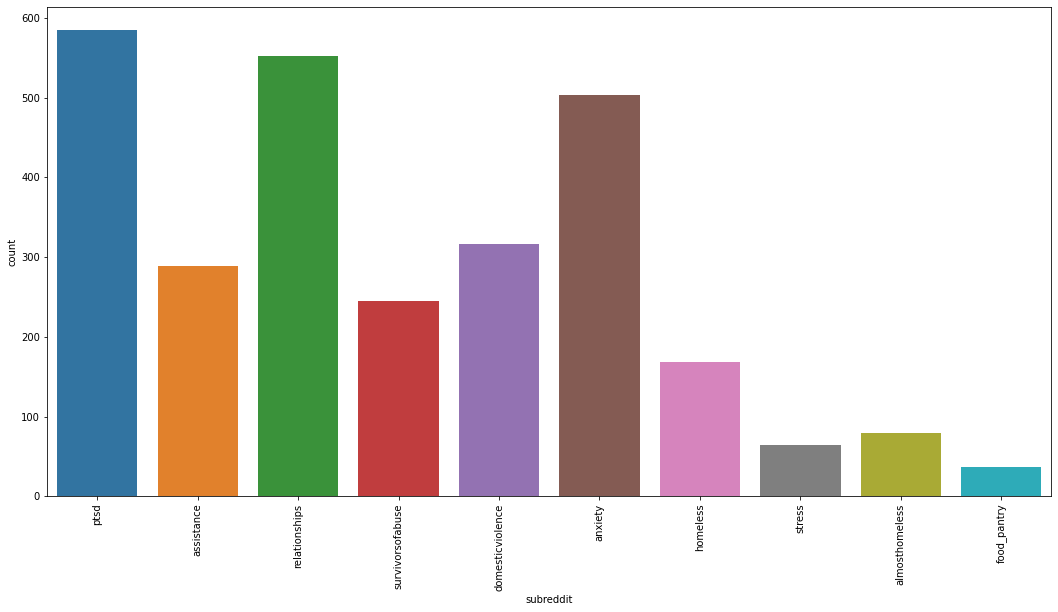

In [10]:
plt.figure(figsize=(18,9))
sns.countplot(x='subreddit', data= data)
plt.xticks(rotation = 90)
plt.show()

In [11]:
data['label'].unique()

array([1, 0], dtype=int64)

In [12]:
data['label'].value_counts()

1    1488
0    1350
Name: label, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

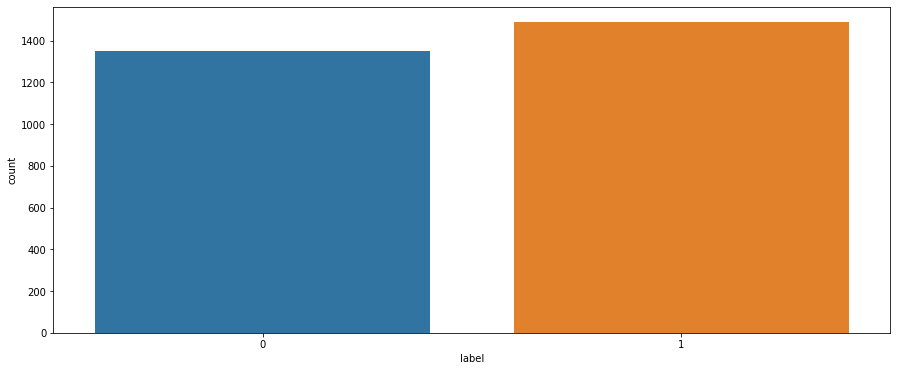

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x="label",data= data)
plt.show


([<matplotlib.patches.Wedge at 0x1d86daabbe0>,
 [Text(0.9578560680418575, 0.7228497443559019, 'ptsd'),
  Text(-0.3924815672416611, 1.134000978560217, 'assistance'),
  Text(-1.197083037098379, 0.08361938944599664, 'relationships'),
  Text(-0.8037461006827217, -0.8910624027739699, 'survivorsofabuse'),
  Text(-0.07699239604654849, -1.1975275240891174, 'domesticviolence'),
  Text(0.6034479730070528, -1.037232155244755, 'anxiety'),
  Text(0.9993290856162347, -0.6643352908294279, 'homeless'),
  Text(1.1420044655423782, -0.3685455205008839, 'stress'),
  Text(1.1860254072102019, -0.18260266551141863, 'almosthomeless'),
  Text(1.1989936079527013, -0.04913581268855061, 'food_pantry')])

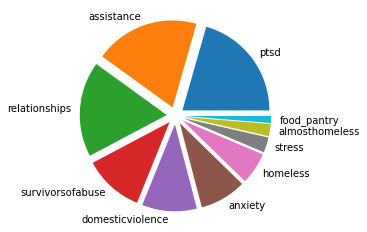

In [14]:
data["subreddit"].unique()
x=data["subreddit"].value_counts()
i=0.1
my=[0.1 for a in range(1,11)]
plt.pie(x,labels=(data["subreddit"].unique()), explode=my)

In [15]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopword=set(stopwords.words('english'))
print(stopwords.words('english'))
print(data['text'][0])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
def clean(text) :
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    print(text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    print(text)
    text = re.sub('<.*?>+', '', text)
    print(text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    print(text)
    text = re.sub('\n', '', text)
    print(text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    print(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    print(text)
    return text
data['text']=data['text'].apply(clean)
print(data['text'])        
    

he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi're a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; one of which i am prone to.. so on top of my "doom" to my gloom..i am now f'n worried about my heart. i do happen to have a physical in 48 hours.
he said he had not felt that way before, suggeted i go rest and so ..trigger ahead if youi're a hypocondriac like me: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something i could even laugh at down the road. no, i ended up reading that this sense of doom can be indicative of various health ailments; on

 feel like pit cannot escap know anxious time terrifi fuck know sure anxious cannot focus well think straight like fuck  somehow everytim feel like want belittl much deliber purpos want see cover blood bruis feel like deserv  edit  
so a bit of long back story here, i was adopted as a child not a proper legal adoption, there was a residency order for me to live with my aunt and uncle for an underdetermined amount of time, after a year my aunt and uncle split and my uncle kept me (my aunt was the one i was actually related to) social services never really got involved past this point. my uncle/ adoptive father started dating a woman that i would come to know as my mum (i always knew they weren’t biological) they had a very destructive relationship and my adoptive father was incredibly abusive towards her (like attempted stabbing & trying to set her on fire in front of me) he was never abusive towards me in fact he treated me like i was untouchable which fostered resentment between me an

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



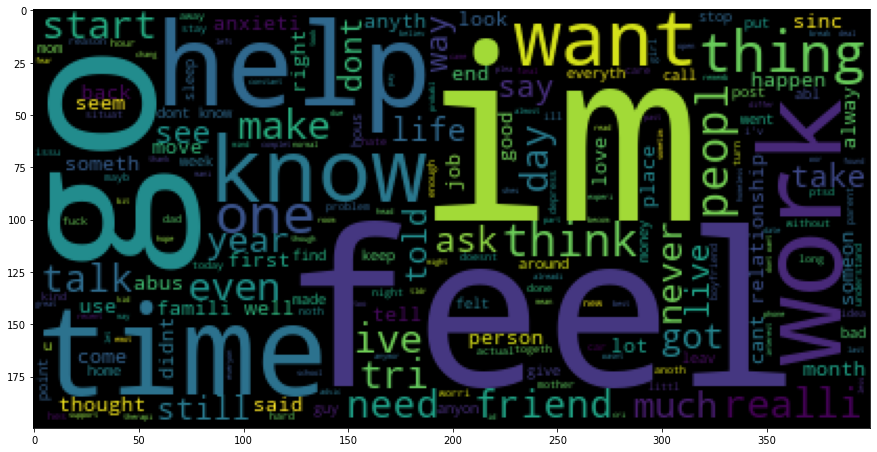

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text=" ".join(i for i in data.text)
stopwords= set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.show()



In [19]:
data['label']=data['label'].map({0:'No stress',1:"Stress"})
data=data[['text','label']]
print(data)

                                                   text      label
0     said felt way sugget go rest trigger ahead you...     Stress
1     hey rassist sure right place post goe  im curr...  No stress
2     mom hit newspap shock would know dont like pla...     Stress
3     met new boyfriend amaz kind sweet good student...     Stress
4     octob domest violenc awar month domest violenc...     Stress
...                                                 ...        ...
2833   week ago precious ignor  jan  happi year prec...  No stress
2834  dont abil cope anymor im tri lot thing trigger...     Stress
2835  case first time your read post look peopl will...  No stress
2836  find normal good relationship main problem see...  No stress
2837  talk mom morn said sister trauma wors mine did...     Stress

[2838 rows x 2 columns]


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [21]:
x = np.array(data["text"])
y = np.array(data["label"])

In [22]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
test_size=0.33,
random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

## Logistic Regression

This type of statistical model is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

In [24]:
model_log = LogisticRegression()
model_log.fit(xtrain, ytrain)

LogisticRegression()

In [25]:
print("Score of this model with x-train and y-train is :", str(round(model_log.score(xtrain, ytrain)*100,2)), "%")
print("Score of this model with x-train and y-train is :", str(round(model_log.score(xtest, ytest)*100,2)), "%")

Score of this model with x-train and y-train is : 99.63 %
Score of this model with x-train and y-train is : 71.5 %


## Decision Tree Classifier


Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [26]:
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [27]:
print("Score of this model with x-train and y-train is :", str(round(model_dt.score(xtrain, ytrain)*100,2)), "%")
print("Score of this model with x-train and y-train is :", str(round(model_dt.score(xtest, ytest)*100,2)), "%")

Score of this model with x-train and y-train is : 100.0 %
Score of this model with x-train and y-train is : 62.43 %


## Random Forest Classifier

This algorithm builds decision trees on different samples and takes their majority vote for classification and average in case of regression. By combining the outputs of these trees, the random forest algorithm delivers a consolidated and more accurate result.

In [28]:
model_rf= RandomForestClassifier(n_estimators= 10,
criterion="entropy")
model_rf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [29]:
print("Score of this model with x-train and y-train is :", str(round(model_rf.score(xtrain, ytrain)*100,2)), "%")
print("Score of this model with x-train and y-train is :", str(round(model_rf.score(xtest, ytest)*100,2)), "%")

Score of this model with x-train and y-train is : 99.16 %
Score of this model with x-train and y-train is : 66.92 %


## KNeighbors Classifier

KNeighborsClassifier
is based on the k nearest neighbors of a sample, which has to be classified. The number 'k' is an integer value specified by the user. This is the most frequently used classifiers of both algorithms.

In [30]:
model_k= KNeighborsClassifier()
model_k.fit(xtrain, ytrain)

KNeighborsClassifier()

In [31]:
print("Score of this model with x-train and y-train is :", str(round(model_k.score(xtrain, ytrain)*100,2)), "%")
print("Score of this model with x-train and y-train is :", str(round(model_k.score(xtest, ytest)*100,2)), "%")

Score of this model with x-train and y-train is : 54.6 %
Score of this model with x-train and y-train is : 50.59 %


## Bernoulli Naive Bayes Algorithm

Bernoulli Naive Bayes is one of the variants of the Naive Bayes algorithm in machine learning. It is very useful to be used when the dataset is in a binary distribution where the output label is present or absent. 

model = BernoulliNB()
model.fit(xtrain, ytrain)

In [33]:
print("Score of this model with x-train and y-train is :", str(round(model.score(xtrain, ytrain)*100,2)), "%")
print("Score of this model with x-train and y-train is :", str(round(model.score(xtest, ytest)*100,2)), "%")

Score of this model with x-train and y-train is : 91.95 %
Score of this model with x-train and y-train is : 74.71 %


In [34]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model_dt.predict(data)
print(output)


Enter a Text: I'm in stress
['Stress']


In [35]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model_dt.predict(data)
print(output)

Enter a Text: She is a strong gal.
['No stress']
